<a href="https://colab.research.google.com/github/sirjit2/AIclass/blob/main/2462286_SirjeetDahal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI/Human_Development_Index_Dataset.csv", encoding="latin1")


Problem 1A: Single-Year HDI Exploration

In [ ]:
# Task 1: Extract latest year data (2022)
df["year"].unique()
hdi_2022_df = df[df["year"] == 2022]

# Task 2: Basic data exploration
hdi_2022_df.head(10)
hdi_2022_df.shape
hdi_2022_df.dtypes

# Task 3: Missing values and data cleaning
hdi_2022_df.isna().sum()
hdi_2022_df = hdi_2022_df.replace("–", np.nan)
hdi_2022_df = hdi_2022_df.drop_duplicates()

numeric_cols = ["hdi", "gross_inc_percap", "life_expectancy", "gender_development"]
for col in numeric_cols:
    hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors="coerce")

hdi_2022_df = hdi_2022_df.dropna(subset=["hdi"])

# Task 4: Basic HDI statistics
hdi_2022_df["hdi"].mean(), hdi_2022_df["hdi"].median(), hdi_2022_df["hdi"].std()

hdi_2022_df.loc[hdi_2022_df["hdi"].idxmax()][["country", "hdi"]],
hdi_2022_df.loc[hdi_2022_df["hdi"].idxmin()][["country", "hdi"]]

# Task 5: Filtering and sorting high HDI countries
top_hdi = hdi_2022_df[hdi_2022_df["hdi"] > 0.800]
top_hdi = top_hdi.sort_values("gross_inc_percap", ascending=False)
top_hdi.head(10)

# Task 6: Add HDI category column
def hdi_category(value):
    if value < 0.550:
        return "Low"
    elif value < 0.700:
        return "Medium"
    elif value < 0.800:
        return "High"
    else:
        return "Very High"

hdi_2022_df["HDI Category"] = hdi_2022_df["hdi"].apply(hdi_category)

# Task 6: Save final dataset
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)


Problem 1B: HDI Trend Analysis

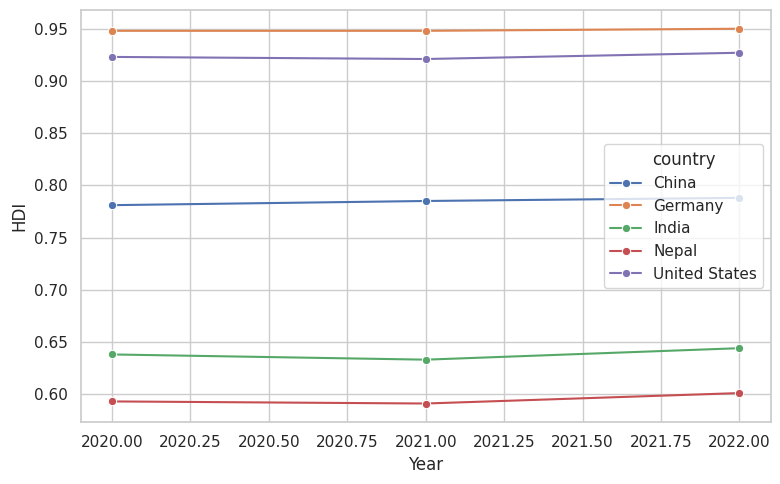

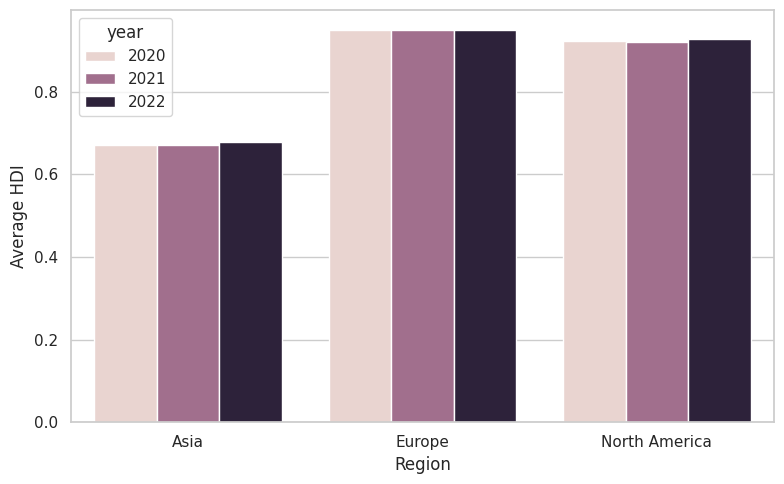

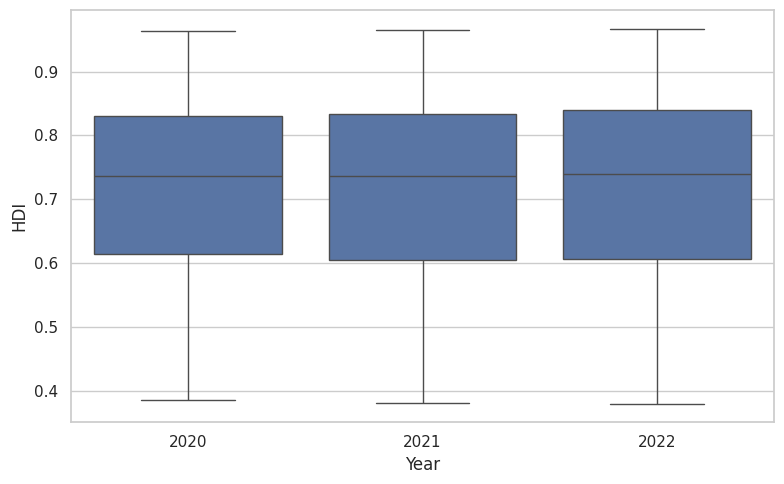

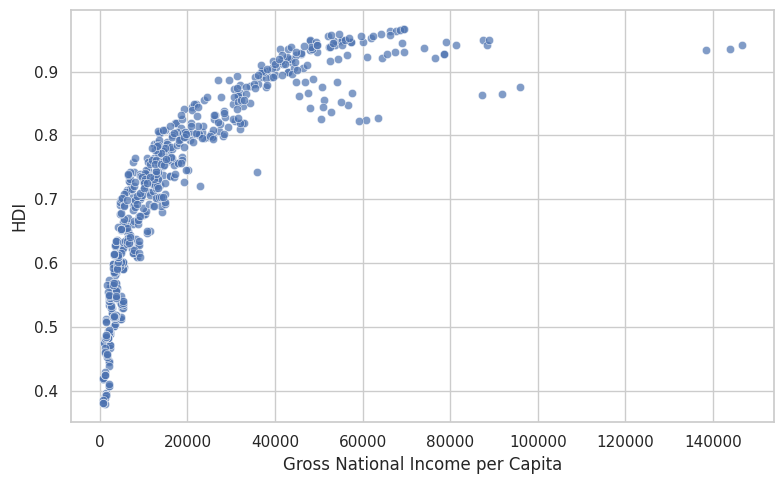

In [ ]:
# Task 1: Data extraction and saving
years_of_interest = [2020, 2021, 2022]
hdi_data = df[df["year"].isin(years_of_interest)].copy()
hdi_data.to_csv("HDI_problem1B.csv", index=False)

# Task 2: Data cleaning
hdi_data = hdi_data.replace("–", np.nan)
hdi_data = hdi_data.drop_duplicates()

numeric_cols = ["hdi", "gross_inc_percap"]
for col in numeric_cols:
    if col in hdi_data.columns:
        hdi_data[col] = pd.to_numeric(hdi_data[col], errors="coerce")

hdi_data = hdi_data.dropna(subset=["hdi", "country", "year"])

# Task 3A: Line chart – HDI trend for selected countries
country_to_region = {
    "Nepal": "Asia",
    "India": "Asia",
    "China": "Asia",
    "United States": "North America",
    "Germany": "Europe"
}

hdi_data["region"] = hdi_data["country"].map(country_to_region)

selected_countries = ["Nepal", "India", "China", "United States", "Germany"]
trend_data = hdi_data[hdi_data["country"].isin(selected_countries)]

plt.figure(figsize=(8, 5))
sns.lineplot(data=trend_data, x="year", y="hdi", hue="country", marker="o")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.tight_layout()
plt.show()

# Task 3B: Bar chart – Average HDI by region
region_data = hdi_data.dropna(subset=["region"])

region_summary = (
    region_data
    .groupby(["region", "year"], as_index=False)["hdi"]
    .mean()
)

plt.figure(figsize=(8, 5))
sns.barplot(data=region_summary, x="region", y="hdi", hue="year")
plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.tight_layout()
plt.show()

# Task 3B: Box plot – HDI distribution by year
plt.figure(figsize=(8, 5))
sns.boxplot(data=hdi_data, x="year", y="hdi")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.tight_layout()
plt.show()

# Task 3B: Scatter plot – HDI vs GNI per capita
if "gross_inc_percap" in hdi_data.columns:
    scatter_data = hdi_data.dropna(subset=["gross_inc_percap", "hdi"])

    plt.figure(figsize=(8, 5))
    sns.scatterplot(
        data=scatter_data,
        x="gross_inc_percap",
        y="hdi",
        alpha=0.7
    )
    plt.xlabel("Gross National Income per Capita")
    plt.ylabel("HDI")
    plt.tight_layout()
    plt.show()
else:
    print("GNI per Capita variable not available in the dataset.")


Problem2


In [ ]:
# Task 1: South Asia data selection
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

south_df = df[df["country"].isin(south_asia)].copy()
south_df.to_csv("HDI_SouthAsia.csv", index=False)

south_df.head()


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948


In [ ]:
# Task 2: Composite score
south_df["life_expectancy"] = pd.to_numeric(
    south_df["life_expectancy"], errors="coerce"
)

south_df["gross_inc_percap"] = pd.to_numeric(
    south_df["gross_inc_percap"], errors="coerce"
)

south_df["Composite_Score"] = (
    0.30 * south_df["life_expectancy"] +
    0.30 * south_df["gross_inc_percap"]
)

top_countries = south_df.sort_values(
    "Composite_Score", ascending=False
)[["country", "Composite_Score"]]

print(top_countries)


          country  Composite_Score
3530     Maldives      5678.289357
3527     Maldives      5628.012408
3526     Maldives      5440.721295
3525     Maldives      5266.375503
3524     Maldives      5097.397866
...           ...              ...
8     Afghanistan       384.070969
4     Afghanistan       376.051646
9     Afghanistan       353.150571
10    Afghanistan       330.792206
11    Afghanistan       311.079466

[264 rows x 2 columns]


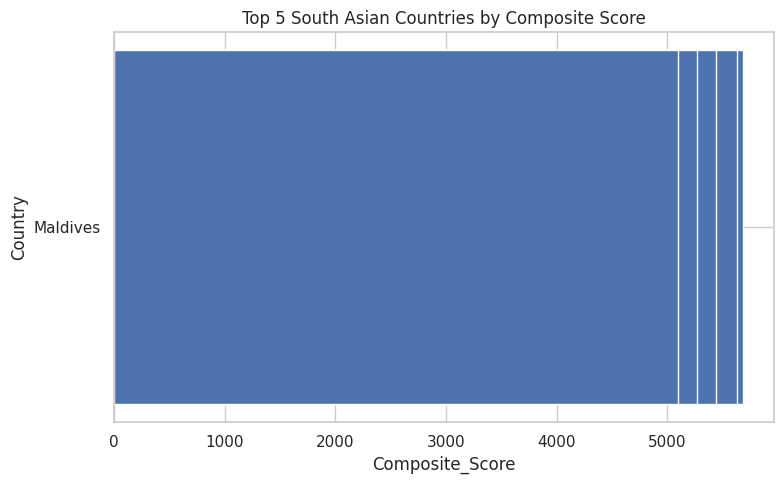

In [ ]:
#Task2
# Top 5 countries by score
top5 = south_df.sort_values("Composite_Score", ascending=False).head(5)

# Horizontal bar chart
plt.figure(figsize=(8, 5))
plt.barh(top5["country"], top5["Composite_Score"])
plt.xlabel("Composite_Score")
plt.ylabel("Country")
plt.title("Top 5 South Asian Countries by Composite Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
#Task3
hdi_q1 = south_df["hdi"].quantile(0.25)
hdi_q3 = south_df["hdi"].quantile(0.75)
hdi_iqr = hdi_q3 - hdi_q1

gni_q1 = south_df["gross_inc_percap"].quantile(0.25)
gni_q3 = south_df["gross_inc_percap"].quantile(0.75)
gni_iqr = gni_q3 - gni_q1

south_df["HDI_Outlier"] = (
    (south_df["hdi"] < hdi_q1 - 1.5 * hdi_iqr) |
    (south_df["hdi"] > hdi_q3 + 1.5 * hdi_iqr)
)

south_df["GNI_Outlier"] = (
    (south_df["gross_inc_percap"] < gni_q1 - 1.5 * gni_iqr) |
    (south_df["gross_inc_percap"] > gni_q3 + 1.5 * gni_iqr)
)


In [ ]:
south_df["gender_development"] = pd.to_numeric(
    south_df["gender_development"], errors="coerce"
)

south_df["hdi"].corr(south_df["life_expectancy"]), \
south_df["hdi"].corr(south_df["gender_development"])


(np.float64(0.9587610559043978), np.float64(0.8656210050127539))

In [ ]:
#Task4
# Making sure gender development column is numeric
south_df["gender_development"] = pd.to_numeric(
    south_df["gender_development"], errors="coerce"
)

# Calculating correlations with HDI
life_corr = south_df["hdi"].corr(south_df["life_expectancy"])
gender_corr = south_df["hdi"].corr(south_df["gender_development"])

life_corr, gender_corr


(np.float64(0.9587610559043978), np.float64(0.8656210050127539))

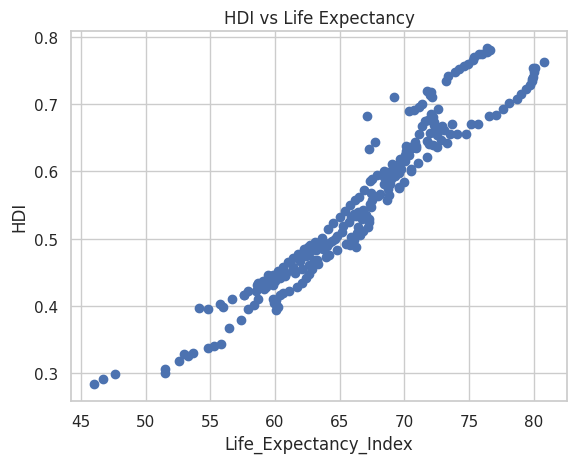

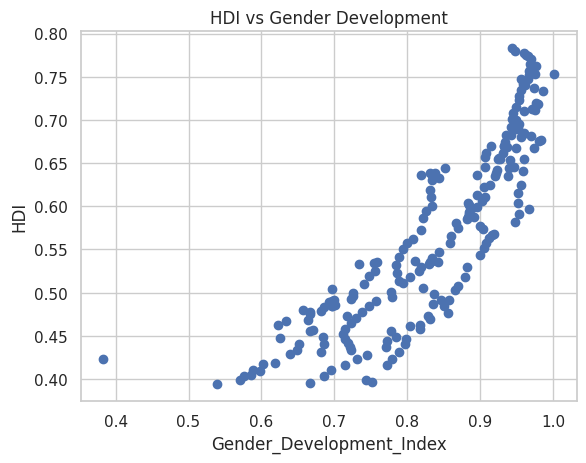

In [ ]:
plt.figure()
plt.scatter(south_df["life_expectancy"], south_df["hdi"])
plt.xlabel("Life_Expectancy_Index")
plt.ylabel("HDI")
plt.title("HDI vs Life Expectancy")
plt.show()

plt.figure()
plt.scatter(south_df["gender_development"], south_df["hdi"])
plt.xlabel("Gender_Development_Index")
plt.ylabel("HDI")
plt.title("HDI vs Gender Development")
plt.show()


In [ ]:
# Calculating difference between income and HDI
south_df["GNI_HDI_Gap"] = (
    south_df["gross_inc_percap"] - south_df["hdi"]
)

# Ranking countries by gap size
gap_rank = south_df.sort_values(
    "GNI_HDI_Gap", ascending=False
)

gap_rank[["country", "GNI_HDI_Gap"]]


,country,GNI_HDI_Gap
3530,Maldives,18846.03019
3527,Maldives,18679.17236
3526,Maldives,18054.97765
3525,Maldives,17473.90201
3524,Maldives,16910.72022
...,...,...
3498,Maldives,NaN
3499,Maldives,NaN
3500,Maldives,NaN
3501,Maldives,NaN


Problem3


In [ ]:
#Task1
# South Asia countries
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Middle East countries
middle_east = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
    "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filtering datasets
sa_df = df[df["country"].isin(south_asia)]
me_df = df[df["country"].isin(middle_east)]

# Saving files
sa_df.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
me_df.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)

In [ ]:
#Task2
# Mean and standard deviation of HDI
sa_mean = sa_df["hdi"].mean()
sa_std = sa_df["hdi"].std()

me_mean = me_df["hdi"].mean()
me_std = me_df["hdi"].std()

sa_mean, sa_std, me_mean, me_std


(np.float64(0.5516485355648535),
 0.11975195787924992,
 np.float64(0.7391035502958581),
 0.12948168042620165)

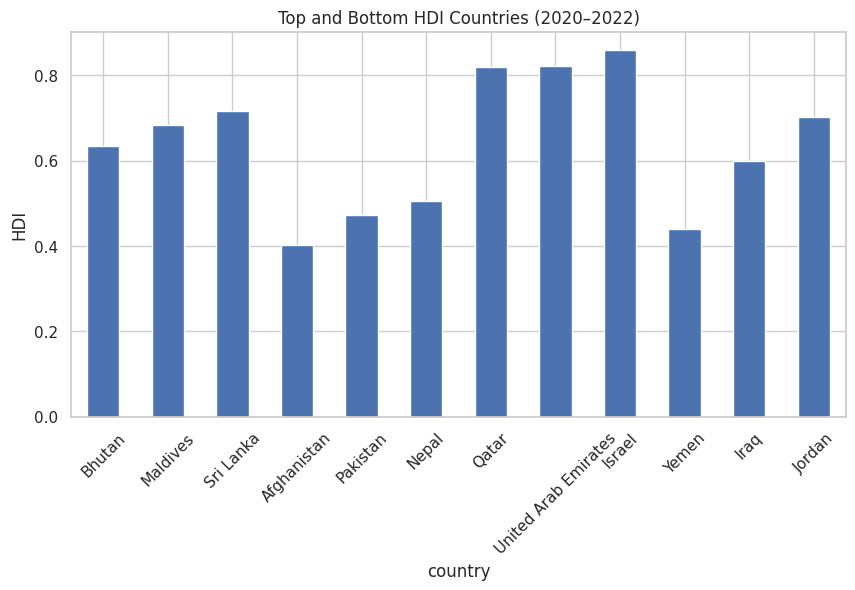

In [ ]:
#Task3
# Average HDI per country
sa_avg = sa_df.groupby("country")["hdi"].mean().sort_values()
me_avg = me_df.groupby("country")["hdi"].mean().sort_values()

# Top and bottom 3
sa_top = sa_avg.tail(3)
sa_bottom = sa_avg.head(3)

me_top = me_avg.tail(3)
me_bottom = me_avg.head(3)
# Combining for plotting
combined = pd.concat([
    sa_top, sa_bottom, me_top, me_bottom
])

# Bar chart
combined.plot(kind="bar", figsize=(10,5))
plt.title("Top and Bottom HDI Countries (2020–2022)")
plt.ylabel("HDI")
plt.xticks(rotation=45)
plt.show()


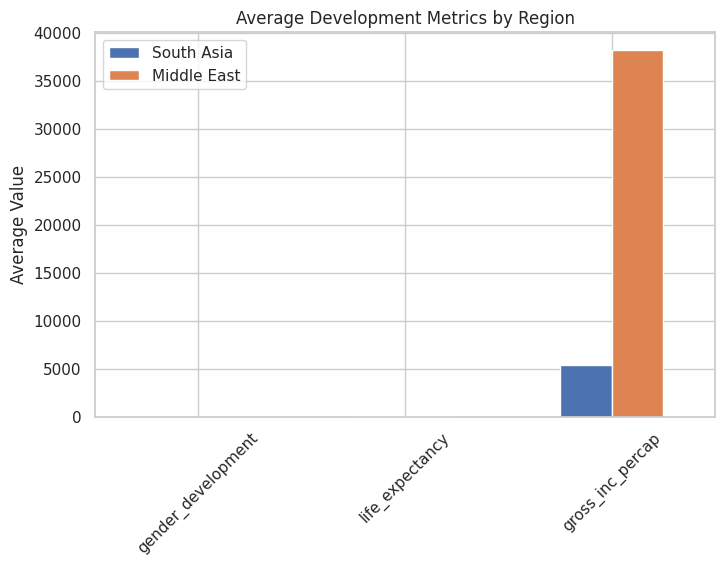

In [ ]:
#Task4
# Metrics to compare
metrics = ["gender_development", "life_expectancy", "gross_inc_percap"]

# Computing mean values
sa_metrics = sa_df[metrics].mean()
me_metrics = me_df[metrics].mean()

# Creating comparison dataframe
metric_df = pd.DataFrame({
    "South Asia": sa_metrics,
    "Middle East": me_metrics
})

# Ploting grouped bar chart
metric_df.plot(kind="bar", figsize=(8,5))
plt.title("Average Development Metrics by Region")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Task5
# HDI range
sa_range = sa_df["hdi"].max() - sa_df["hdi"].min()
me_range = me_df["hdi"].max() - me_df["hdi"].min()

# Coefficient of variation
sa_cv = sa_std / sa_mean
me_cv = me_std / me_mean

sa_range, sa_cv, me_range, me_cv


(0.49900000000000005,
 np.float64(0.21708016999742674),
 0.5800000000000001,
 np.float64(0.1751874691636524))

In [ ]:
#Task6
# Correlation values
sa_corr = sa_df[["hdi", "gender_development", "life_expectancy"]].corr()
me_corr = me_df[["hdi", "gender_development", "life_expectancy"]].corr()

sa_corr, me_corr


(                         hdi  gender_development  life_expectancy
 hdi                 1.000000            0.865621         0.958761
 gender_development  0.865621            1.000000         0.829553
 life_expectancy     0.958761            0.829553         1.000000,
                          hdi  gender_development  life_expectancy
 hdi                 1.000000            0.931082         0.943002
 gender_development  0.931082            1.000000         0.886640
 life_expectancy     0.943002            0.886640         1.000000)

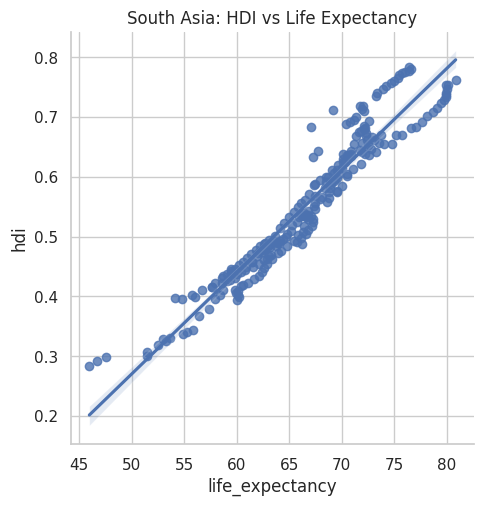

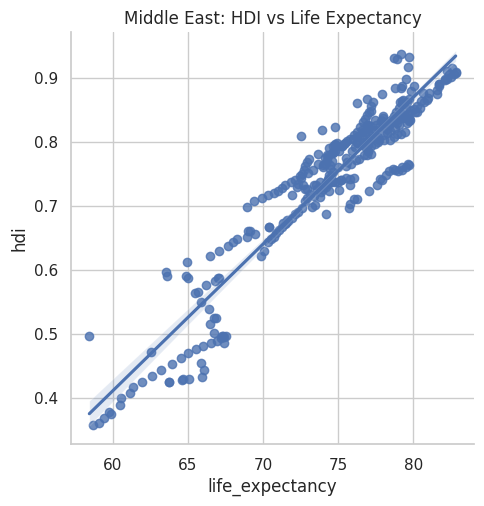

In [ ]:
# Scatter ploting with trendlines
sns.lmplot(data=sa_df, x="life_expectancy", y="hdi")
plt.title("South Asia: HDI vs Life Expectancy")
plt.show()

sns.lmplot(data=me_df, x="life_expectancy", y="hdi")
plt.title("Middle East: HDI vs Life Expectancy")
plt.show()


In [ ]:
#Task7
# Function to find outliers
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return data[(data[column] < Q1 - 1.5*IQR) | (data[column] > Q3 + 1.5*IQR)]



In [ ]:
# Detect outliers
sa_outliers = find_outliers(sa_df, "hdi")
me_outliers = find_outliers(me_df, "hdi")


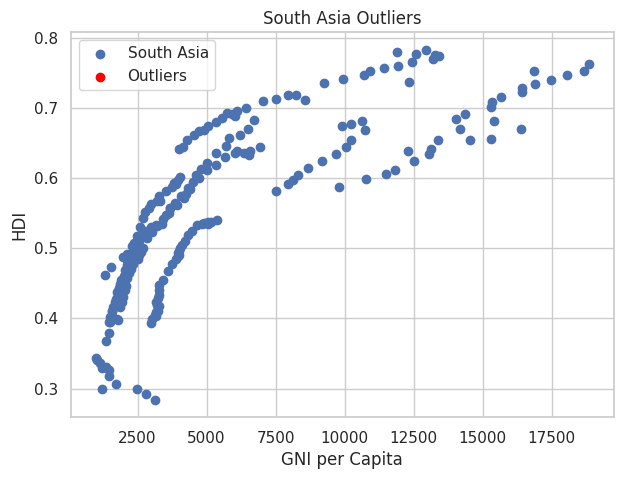

In [ ]:
# Scatter plot highlighting outliers
plt.figure(figsize=(7,5))
plt.scatter(sa_df["gross_inc_percap"], sa_df["hdi"], label="South Asia")
plt.scatter(sa_outliers["gross_inc_percap"], sa_outliers["hdi"], color="red", label="Outliers")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("South Asia Outliers")
plt.legend()
plt.show()
